- airplane : 0
- automobile : 1
- bird : 2
- cat : 3
- deer : 4
- dog : 5
- frog : 6
- horse : 7
- ship : 8
- truck : 9

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, activations
from tensorflow.keras.utils import to_categorical

# this module has the cifar 10 data set
from tensorflow.keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print(train_images.shape)
print(test_images.shape)

170500096/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


(32, 32, 3)
[8]


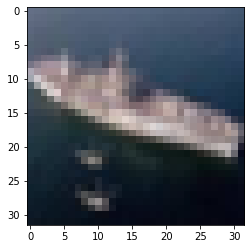

In [3]:
sample = 789
print(test_images[sample].shape)
# print(test_images[sample])
print(test_labels[sample])

plt.imshow(test_images[sample])

In [4]:
# primero sacar los componentes de color (50000, (tamaño de todos los inputs ))
train_images_standard = train_images.reshape((50000, 32*32*3))

train_images_standard = train_images_standard.astype('float32') / 255

test_images_standard = test_images.reshape((10000, 32*32*3))
test_images_standard  = test_images_standard.astype('float32') / 255

print(train_images.shape)
print(train_images_standard.shape)

(50000, 32, 32, 3)
(50000, 3072)


In [5]:
train_labels_standard = to_categorical(train_labels)
test_labels_standard = to_categorical(test_labels)

In [22]:
network = models.Sequential()

network.add(layers.Dense(200, activation='relu', input_shape=(3072,), name='hidden_1'))
network.add(layers.Dense(160, activation='relu', name='hidden_2'))
network.add(layers.Dense(120, activation='relu', name='hidden_3'))
network.add(layers.Dense(60, activation='relu', name='hidden_4'))
network.add(layers.Dense(10, activation='softmax', name='output'))

network.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

network.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 200)               614600    
_________________________________________________________________
hidden_2 (Dense)             (None, 160)               32160     
_________________________________________________________________
hidden_3 (Dense)             (None, 120)               19320     
_________________________________________________________________
hidden_4 (Dense)             (None, 60)                7260      
_________________________________________________________________
output (Dense)               (None, 10)                610       
Total params: 673,950
Trainable params: 673,950
Non-trainable params: 0
_________________________________________________________________


In [23]:
x_train = train_images_standard[:35000]
x_val = train_images_standard[35000:]

y_train = train_labels_standard[:35000]
y_val = train_labels_standard[35000:]

In [24]:
t0 = time.time()
history = network.fit(x_train, y_train, epochs=30, validation_data = (x_val, y_val))
t1 = time.time()

Epoch 1/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.9365 - accuracy: 0.3003 - val_loss: 1.8252 - val_accuracy: 0.3419
Epoch 2/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.7369 - accuracy: 0.3773 - val_loss: 1.7289 - val_accuracy: 0.3812
Epoch 3/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.6516 - accuracy: 0.4102 - val_loss: 1.6559 - val_accuracy: 0.4070
Epoch 4/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.5956 - accuracy: 0.4312 - val_loss: 1.6026 - val_accuracy: 0.4284
Epoch 5/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.5464 - accuracy: 0.4504 - val_loss: 1.5900 - val_accuracy: 0.4350
Epoch 6/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.5087 - accuracy: 0.4658 - val_loss: 1.5485 - val_accuracy: 0.4439
Epoch 7/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.4786 - accuracy: 0.4750 - val_loss: 1.5543 - val_accuracy:

In [17]:

print("Training time : ", (t1-t0) )

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

Training time :  202.51951813697815


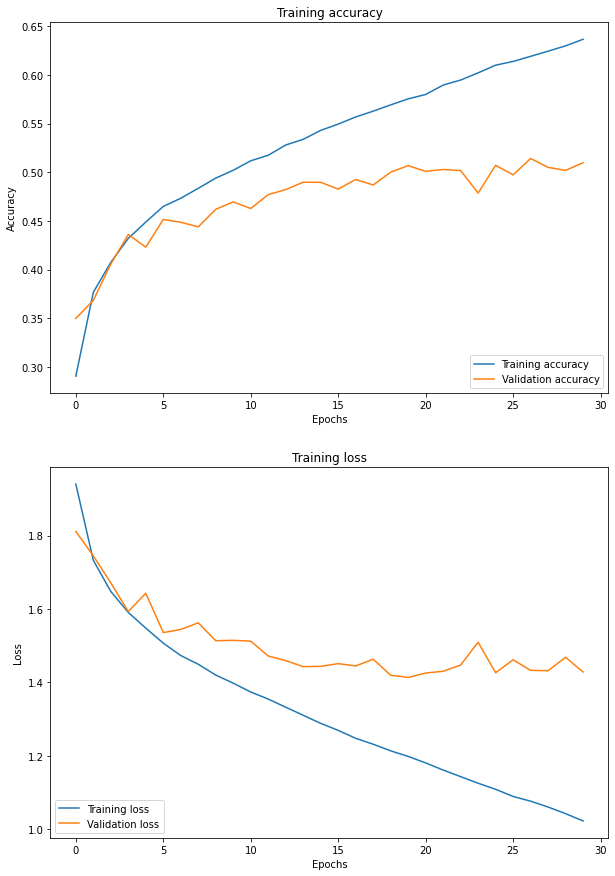

In [18]:
fig, ax = plt.subplots(2, 1, figsize=(10, 15))
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].plot(acc_values, label="Training accuracy")
ax[0].plot(val_acc_values, label="Validation accuracy")
ax[0].set_title("Training accuracy")
ax[0].legend(loc='lower right')

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].plot(loss_values, label="Training loss")
ax[1].plot(val_loss_values, label="Validation loss")
ax[1].set_title("Training loss")
ax[1].legend(loc='lower left')

In [12]:
test_results = network.evaluate(test_images_standard, test_labels_standard)
print(test_results)

313/313 [==============================] - 1s 3ms/step - loss: 1.4602 - accuracy: 0.4839
[1.46016263961792, 0.4839000105857849]


[[0.06  0.007 0.257 0.17  0.12  0.241 0.006 0.126 0.011 0.003]]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


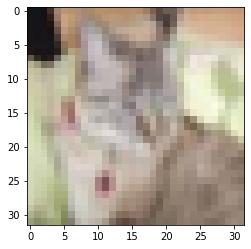

In [13]:
test_image = 8

input_image = test_images[test_image].reshape((1,3072))
input_image = input_image.astype('float32') / 255

prediction = network.predict(input_image)

np.set_printoptions(precision=3, suppress=True)
print(prediction)
print(test_labels_standard[test_image])

plt.imshow(test_images[test_image])

## Link for the test performed:
https://drive.google.com/drive/folders/1b0Id-M9DHirqzCv7EvzBQC6qp0rwklKi?usp=sharing